<a href="https://colab.research.google.com/github/AakanshSing/Cotton-Disease-Prediction-Deep-Learning/blob/main/Cotton_Disease_Prediction_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/data/train'
valid_path = '/content/drive/MyDrive/data/val'

In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [5]:
for layer in inception.layers:
    layer.trainable = False

In [6]:
train_folders = glob('/content/drive/MyDrive/data/train/*')
test_folders = glob('/content/drive/MyDrive/data/test/*')
print(f'Number of classes in training set: {len(train_folders)}')
print(f'Number of classes in test set: {len(test_folders)}')

Number of classes in training set: 4
Number of classes in test set: 4


In [7]:
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(train_folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
#provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [15]:
# Now try fitting the model again
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-c59a2999292b>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 537s 9s/step - loss: 1.6490 - accuracy: 0.7683 - val_loss: 1.3702 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 38s 618ms/step - loss: 0.5584 - accuracy: 0.8970 - val_loss: 0.3602 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 35s 573ms/step - loss: 0.5418 - accuracy: 0.8990 - val_loss: 0.0315 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 36s 594ms/step - loss: 0.4781 - accuracy: 0.9277 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 34s 561ms/step - loss: 0.5641 - accuracy: 0.9052 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 37s 613ms/step - loss: 0.4954 - accuracy: 0.9247 - val_loss: 2.8763e-04 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 34s 563ms/step - loss: 0.3417 - accuracy: 0.9513 - val_loss: 0.0060 - val_accuracy: 1.00

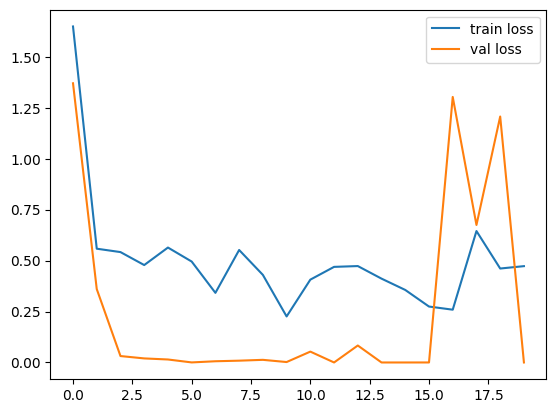

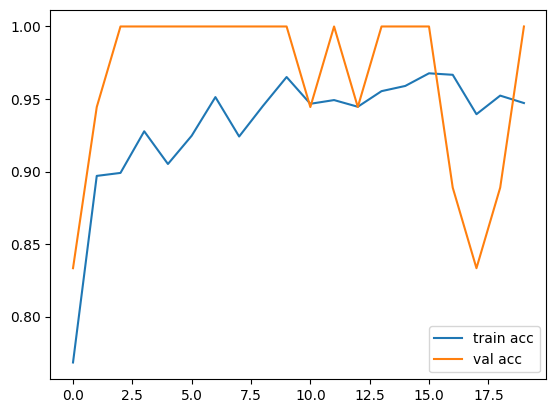

<Figure size 640x480 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
y_pred = model.predict(test_set)

1/1 [==============================] - 3s 3s/step


In [19]:
y_pred

array([[1.3920476e-31, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.3815124e-27, 3.5017019e-32, 1.0000000e+00, 6.6241589e-24],
       [6.0517712e-36, 1.0000000e+00, 2.6275645e-14, 3.3063161e-16],
       [0.0000000e+00, 1.0000000e+00, 3.3434156e-23, 4.0267622e-24],
       [8.3754341e-27, 2.6408389e-10, 7.7918195e-14, 1.0000000e+00],
       [0.0000000e+00, 3.1846530e-17, 4.6165410e-34, 1.0000000e+00],
       [2.6282682e-35, 2.3693339e-32, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 6.4147980e-24, 1.1688811e-24],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 3.2289681e-27],
       [2.9701212e-25, 1.0000000e+00, 7.6244415e-33, 7.2821720e-35],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 5.5365276e-17, 1.4460886e-22, 1.9135235e-27],
       [1.0000000e+00, 7.3195761e-27, 4.3035931e-14, 3.5351836e-35],
       [5.3212007e-23, 1.7732505e-23, 5.1139924e-04, 9.9948859e-01],
       [8.5726693e-29, 0.0000000e+

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([2, 2, 1, 1, 3, 3, 2, 0, 1, 1, 3, 0, 0, 3, 2, 1, 3, 2])